# PD1 Piotr Fic
### Indeks: 298818
### Import bibliotek

In [5]:
import numpy as np
from numpy import random
import math
import pandas as pd
import matplotlib.pyplot as plt

### Funkcja sigmoidalna

In [6]:
def sigmoid(x):
    return 1/(1 + math.exp(-x))

### Funkcje pomocnicze

In [7]:
def MAE(predicted, real):
    return np.mean(np.abs(predicted - real))

In [8]:
def predicted_real(predicted, real):
    plt.scatter(real, predicted, c='blue')
    p1 = max(max(predicted), max(real))
    p2 = min(min(predicted), min(real))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True values')
    plt.ylabel('Predictions')
    plt.title('Predictions visualization on test set')
    plt.axis('equal')
    plt.show()

## Bazowa implementacja sieci MLP
### Klasa warstwy

In [9]:
class Layer:
        
    def __init__(self, 
                 #Liczba neuronów w poprzedzającej i kolejnej warstwie
                 input_size: int, 
                 output_size: int,
                 #Domyślna funkcja aktywacyjna to sigmoid
                 activation_fun = sigmoid, 
                 #Możliwe do ustawienia wagi i bias-y
                 weights = None, 
                 biases = None):
        
        #Domyślne losowo wygenerowane wagi i bias-y jeśli nie zostały podane
        d_weights = random.uniform(size = (input_size, output_size))
        d_biases = random.uniform(size = output_size)
        
        #Wagi dla wszystkich neuronów z warstwy 
        self.weights = weights if weights is not None else d_weights
        
        #Stałe "b"
        self.biases = biases if biases is not None else d_biases
        
        #Funkcja aktywacji, w tym miejscu dokonuję jej wektoryzacji do użycia na całą warstwę
        v_activation_fun = np.vectorize(activation_fun)
        self.activation_fun = v_activation_fun
    
    def forward(self, input):
        #Przekształca input z poprzedniej warstwy przez wagi i funkcję aktywacji 
        #Zwraca output do przekazania kolejnej warstwie
        return self.activation_fun(input @ self.weights + self.biases)

### Klasa sieci MLP

In [10]:
class Network:
    
    def __init__(self, layers: list):
        
        #Warstwy
        self.layers = layers
        
    def forward(self, X):
        #Oblicza output na podstawie danych i parametrów warstw
        output = X
        for layer in self.layers:
            output = layer.forward(output)
        return output

## Test na zadaniach regresji
### Metodologia

Dla wybranej architektury:

- dopasowywanie ręczne wag na zbiorze treningowym
- sprawdzenie miary MAE na zbiorze testowym

Dla pozostałych do rozważenia architektur sprawdzenie działania przy losowych parametrach.

In [11]:
#Funkcje pmocnicze
def normalize(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

def prepear_data(df_train, df_test):
    #Separacja wektorów cech i odpowiedzi
    x_train, x_test = df_train.iloc[:, 1], df_test.iloc[:, 1]
    x_train, x_test = np.array(x_train), np.array(x_test)
    #Implementacja wymaga "pionowego" wektora cech
    x_train.shape = (len(x_train), 1)
    x_test.shape = (len(x_test), 1)
    y_train, y_test = np.array(df_train.iloc[:, 2:3]), np.array(df_test.iloc[:, 2:3])
    #Normalizacja
    x_train, x_test = normalize(x_train), normalize(x_test)
    y_train, y_test = normalize(y_train), normalize(y_test)
    return x_train, y_train, x_test, y_test

## Zbiór "square-simple"

In [12]:
df1_train = pd.read_csv("./mio1/regression/square-simple-training.csv")
df1_test = pd.read_csv("./mio1/regression/square-simple-test.csv")
x_train, y_train, x_test, y_test = prepear_data(df1_train, df1_test)

### Architektura: 1 warstwa ukryta (5 neuronów)

In [13]:
#Utworzenie warst z dobranymi parametrami
l1 = Layer(input_size=1, output_size=5, 
           weights=np.array([[0.75, -0.8, 0.4, -0.7, 0.4]]), 
           biases=np.array([-1, -0.9, -0.9, -1, 0.2]))

l2 = Layer(input_size=5, output_size=1, 
           activation_fun= lambda x: x, 
           weights = np.array([40, 40, 35, 35, 0]).reshape(-1, 1), 
           biases = -41.25)

#Konstrukcja obiektu sieci i predykcja na danych treningowych i testowych
mlp = Network([l1, l2])
pred_train = mlp.forward(x_train)
pred_test = mlp.forward(x_test)

In [14]:
print(MAE(pred_train, y_train))
print(MAE(pred_test, y_test))

0.06048353721655544
0.0656071439087572


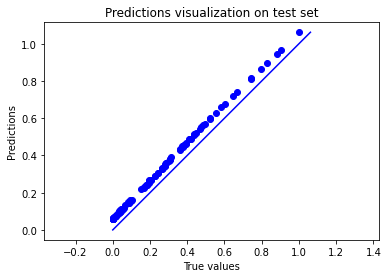

In [15]:
predicted_real(pred_test, y_test)

In [16]:
#Architektura: 1 warstwa (10 neuronów) losowe parametry
l1 = Layer(1, 10)
l2 = Layer(10, 1, activation_fun= lambda x: x)

mlp = Network([l1, l2])
pred_train = mlp.forward(x_train)
pred_test = mlp.forward(x_test)

print(MAE(pred_train, y_train))
print(MAE(pred_test, y_test))

3.2423852681787686
3.258373754113279


In [17]:
#Architektura: 2 warstwy (5 - 5 neuronów) losowe parametry
l1 = Layer(1, 5)
l2 = Layer(5, 5)
l3 = Layer(5, 1, activation_fun= lambda x: x)

mlp = Network([l1, l2, l3])
pred_train = mlp.forward(x_train)
pred_test = mlp.forward(x_test)

print(MAE(pred_train, y_train))
print(MAE(pred_test, y_test))

1.864354823723947
1.8972596150447143


## Zbiór "steps-large"

In [18]:
df2_train = pd.read_csv("./mio1/regression/steps-large-training.csv")
df2_test = pd.read_csv("./mio1/regression/steps-large-test.csv")
x_train, y_train, x_test, y_test = prepear_data(df2_train, df2_test)

### Architektura: 1 warstwa ukryta (5 neuronów)

In [19]:
#Utworzenie warst z dobranymi parametrami
l1 = Layer(input_size=1, output_size=5, 
           weights=np.array([[10, 10, 10, 10, 0]]), 
           biases=np.array([5, -5, -15, -25, 0]))

l2 = Layer(input_size=5, output_size=1, 
           activation_fun= lambda x: x, 
           weights = np.array([2, 2, 2, 0, -2.5]).reshape(-1, 1), 
           biases = -1)

#Konstrukcja obiektu sieci i predykcja na danych treningowych i testowych
mlp = Network([l1, l2])
pred_train = mlp.forward(x_train)
pred_test = mlp.forward(x_test)

In [20]:
print(MAE(pred_train, y_train))
print(MAE(pred_test, y_test))

0.4829064794117987
0.4839129449712365


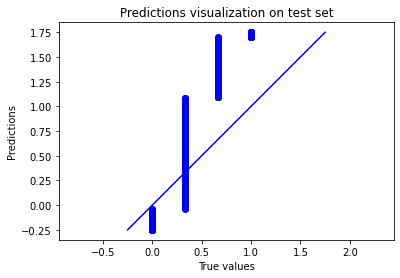

In [21]:
predicted_real(pred_test, y_test)

In [22]:
#Architektura: 1 warstwa (10 neuronów) losowe parametry
l1 = Layer(1, 10)
l2 = Layer(10, 1, activation_fun= lambda x: x)

mlp = Network([l1, l2])
pred_train = mlp.forward(x_train)
pred_test = mlp.forward(x_test)

print(MAE(pred_train, y_train))
print(MAE(pred_test, y_test))

3.9242445047403067
3.9222185130039366


In [23]:
#Architektura: 2 warstwy (5 - 5 neuronów) losowe parametry
l1 = Layer(1, 5)
l2 = Layer(5, 5)
l3 = Layer(5, 1, activation_fun= lambda x: x)

mlp = Network([l1, l2, l3])
pred_train = mlp.forward(x_train)
pred_test = mlp.forward(x_test)

print(MAE(pred_train, y_train))
print(MAE(pred_test, y_test))

3.5783828435504867
3.5766297983139994


### Podsumowanie

 - ręczne dobranie wag jest bardzo trudne
 - mimo to nawet ręcznie ustawione parametry są znacząco korzystniejsze od losowych
 - sieć MLP z tylko losowo zainicjalizowanymi parametrami w zasadzie nie nadaje się do użytku
 - implementacja pozostaje na razie możliwie najmniej skomplikowana mając na uwadze, że będzie intensywnie rozbudowywana